In [84]:
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole


In [3]:
IPythonConsole.molSize = 500,500
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.minFontSize=15
IPythonConsole.drawOptions.bondLineWidth=2

In [13]:
mol = Chem.MolFromSmiles("c1c[nH]c(CN2CCc3ccccc3C2)c1")
k777 = Chem.MolFromSmiles("CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C/S(=O)(=O)c2ccccc2)CCc2ccccc2)CC1")
odn = Chem.MolFromSmiles("CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1")

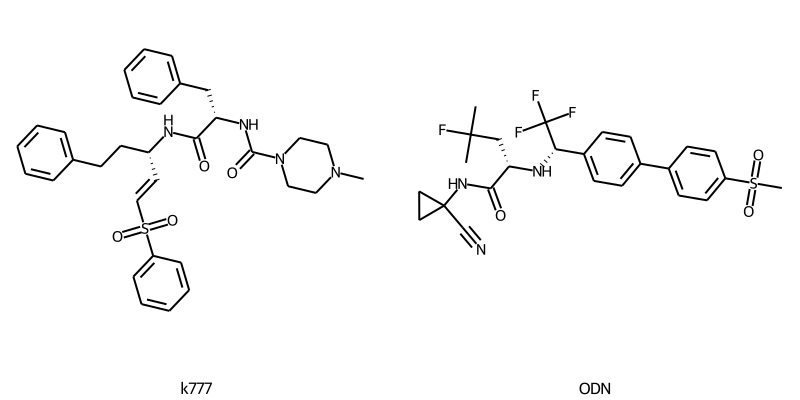

In [82]:
imagem = Chem.Draw.MolsToGridImage([k777, odn], legends=["k777", "ODN"], subImgSize=(400,400),returnPNG=False,molsPerRow=2)
imagem

In [83]:
imagem.save("imagens/ligantes_k777_odn.png")

In [40]:
import pandas as pd
import sqlite3

In [41]:
con_odn = sqlite3.connect("../data/ligantes_odn.db")
con_k777 = sqlite3.connect("../data/ligantes_k777.db")

In [42]:
novos_ligantes_odn = pd.read_sql("select * from novos_ligantes",con_odn)

In [43]:
novos_ligantes_odn

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(...,5.28070,94.02,539.262043,0.262463,5,2,0.118493,0.35
1,N#Cc1ccc(C(CN2CCCCCCC2=O)NCC2(NC(=O)c3ccc(Cl)c...,4.84158,108.29,535.248142,0.502449,5,2,0.184731,0.40
2,CSCCC(NC(=O)C1CCCCN1C(=O)COc1c(C2CCCCC2)ccc2cc...,4.96990,95.94,526.250143,0.453882,5,2,0.009038,0.36
3,CCc1cc(-c2ncc(C(=O)Nc3ccc(CC(=O)NC4CCCN(C(C)=O...,4.54992,100.63,528.273656,0.446852,5,2,0.000647,0.37
4,CC(C)=CC(=O)N1CCC(N2CC(CC#N)(n3ccc(-c4cc(C)c5[...,4.24890,109.10,528.332508,0.482673,6,2,0.004814,0.37
...,...,...,...,...,...,...,...,...,...
22501,CCCOc1ccc(C)cc1NC(=O)N1CCN(C(=O)c2c(C)cccc2O)C...,4.96814,99.18,529.257671,0.450416,5,2,0.000335,0.38
22502,CC(=O)c1cccc(NC(=O)NC(CC2CCCCC2)C(=O)N2CCC(=O)...,4.91922,98.82,532.304956,0.471684,4,2,0.003887,0.40
22503,CC(C)Oc1ccc(C(=O)N2CCC(C(=O)Nc3ccc(NC(=O)Cc4cc...,5.28500,87.74,517.237685,0.425390,4,2,0.000996,0.30
22504,CC(C)CC(=O)Nc1ccc2c(c1)C(=O)N(C(C)CO)CC(C)C(CN...,4.57120,99.18,523.304621,0.501669,5,2,0.004950,0.35


In [46]:
seis_primeiros_ligs_odn = novos_ligantes_odn.loc[novos_ligantes_odn.Smiles.str.contains("#")].sort_values(by='active_probability', ascending=False).iloc[:6,:]
seis_primeiros_ligs_odn

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
3666,CCc1ncnc(-c2cc(C(C)(C)C)cc(N3CCN(CC4CC4)C3=O)c...,4.87147,98.20,524.289974,0.449617,5,2,0.392247,0.38
1199,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,4.73728,94.46,524.255419,0.442619,5,2,0.314312,0.42
21723,N#Cc1ccc(-n2[nH]c(-c3ccccc3Cl)c(C(=O)NCCN3CCCC...,5.05648,89.21,516.240437,0.459867,5,2,0.307517,0.37
20670,COc1cccc2c1Cc1ccccc1CC2C(=O)NC(Cc1ccccc1)C(=O)...,3.84058,100.45,523.247107,0.467395,5,2,0.301623,0.41
11794,C=CC(C)N1CCCC1CNC(=O)c1ccc(S(=O)Nc2cc(Cl)c(OC)...,4.77708,94.46,520.110267,0.463684,5,2,0.293248,0.37
19443,CN1Cc2cc(NC(=O)N3CCC(C(=O)Nc4cccc(OCC#Cc5ccccc...,4.55380,100.21,524.205970,0.477164,5,2,0.288616,0.34


In [47]:
seis_primeiros_ligs_odn = seis_primeiros_ligs_odn.to_numpy().tolist()

In [72]:
elementos_odn = [Chem.MolFromSmiles(elemento[0]) for elemento in seis_primeiros_ligs_odn]
prob_odn = [f"Indice de Tanimoto: {elemento[-1] * 100}%" for elemento in seis_primeiros_ligs_odn]             

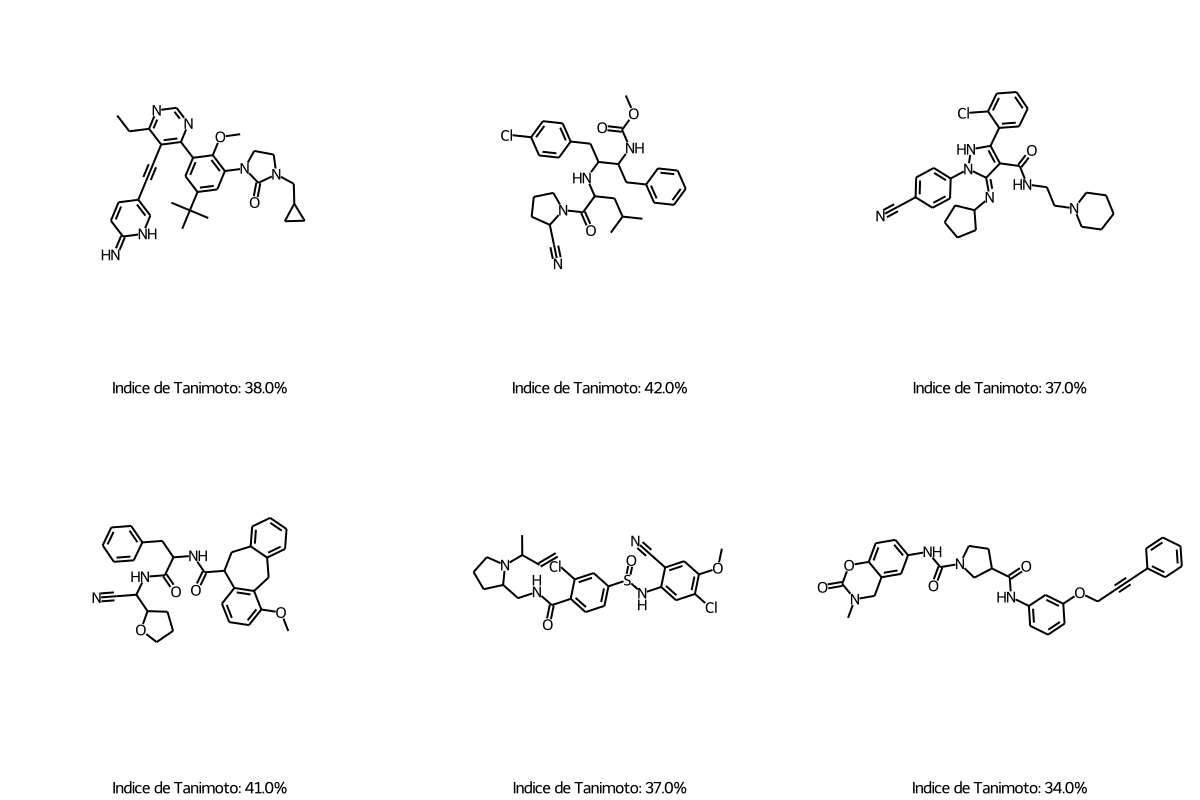

In [73]:
imagem_ligs_odn = Chem.Draw.MolsToGridImage(elementos_odn, legends=prob_odn,subImgSize=(400,400),returnPNG=False)
imagem_ligs_odn

In [51]:
novos_ligantes_k777 = pd.read_sql("select * from novos_ligantes",con_odn)
novos_ligantes_k777

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(...,5.28070,94.02,539.262043,0.262463,5,2,0.118493,0.35
1,N#Cc1ccc(C(CN2CCCCCCC2=O)NCC2(NC(=O)c3ccc(Cl)c...,4.84158,108.29,535.248142,0.502449,5,2,0.184731,0.40
2,CSCCC(NC(=O)C1CCCCN1C(=O)COc1c(C2CCCCC2)ccc2cc...,4.96990,95.94,526.250143,0.453882,5,2,0.009038,0.36
3,CCc1cc(-c2ncc(C(=O)Nc3ccc(CC(=O)NC4CCCN(C(C)=O...,4.54992,100.63,528.273656,0.446852,5,2,0.000647,0.37
4,CC(C)=CC(=O)N1CCC(N2CC(CC#N)(n3ccc(-c4cc(C)c5[...,4.24890,109.10,528.332508,0.482673,6,2,0.004814,0.37
...,...,...,...,...,...,...,...,...,...
22501,CCCOc1ccc(C)cc1NC(=O)N1CCN(C(=O)c2c(C)cccc2O)C...,4.96814,99.18,529.257671,0.450416,5,2,0.000335,0.38
22502,CC(=O)c1cccc(NC(=O)NC(CC2CCCCC2)C(=O)N2CCC(=O)...,4.91922,98.82,532.304956,0.471684,4,2,0.003887,0.40
22503,CC(C)Oc1ccc(C(=O)N2CCC(C(=O)Nc3ccc(NC(=O)Cc4cc...,5.28500,87.74,517.237685,0.425390,4,2,0.000996,0.30
22504,CC(C)CC(=O)Nc1ccc2c(c1)C(=O)N(C(C)CO)CC(C)C(CN...,4.57120,99.18,523.304621,0.501669,5,2,0.004950,0.35


In [56]:
seis_primeiros_ligs_k777 = novos_ligantes_k777.loc[novos_ligantes_k777.Smiles.str.contains("#")].sort_values(by='active_probability', ascending=False).iloc[:6,:]
seis_primeiros_ligs_k777

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
3666,CCc1ncnc(-c2cc(C(C)(C)C)cc(N3CCN(CC4CC4)C3=O)c...,4.87147,98.20,524.289974,0.449617,5,2,0.392247,0.38
1199,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,4.73728,94.46,524.255419,0.442619,5,2,0.314312,0.42
21723,N#Cc1ccc(-n2[nH]c(-c3ccccc3Cl)c(C(=O)NCCN3CCCC...,5.05648,89.21,516.240437,0.459867,5,2,0.307517,0.37
20670,COc1cccc2c1Cc1ccccc1CC2C(=O)NC(Cc1ccccc1)C(=O)...,3.84058,100.45,523.247107,0.467395,5,2,0.301623,0.41
11794,C=CC(C)N1CCCC1CNC(=O)c1ccc(S(=O)Nc2cc(Cl)c(OC)...,4.77708,94.46,520.110267,0.463684,5,2,0.293248,0.37
19443,CN1Cc2cc(NC(=O)N3CCC(C(=O)Nc4cccc(OCC#Cc5ccccc...,4.55380,100.21,524.205970,0.477164,5,2,0.288616,0.34


In [57]:
seis_primeiros_ligs_k777 = seis_primeiros_ligs_k777.to_numpy().tolist()

In [74]:
elementos_k777 = [Chem.MolFromSmiles(elemento[0]) for elemento in seis_primeiros_ligs_k777]
prob_k777 = [f"Indice de Tanimoto: {elemento[-1] * 100}%" for elemento in seis_primeiros_ligs_odn]             

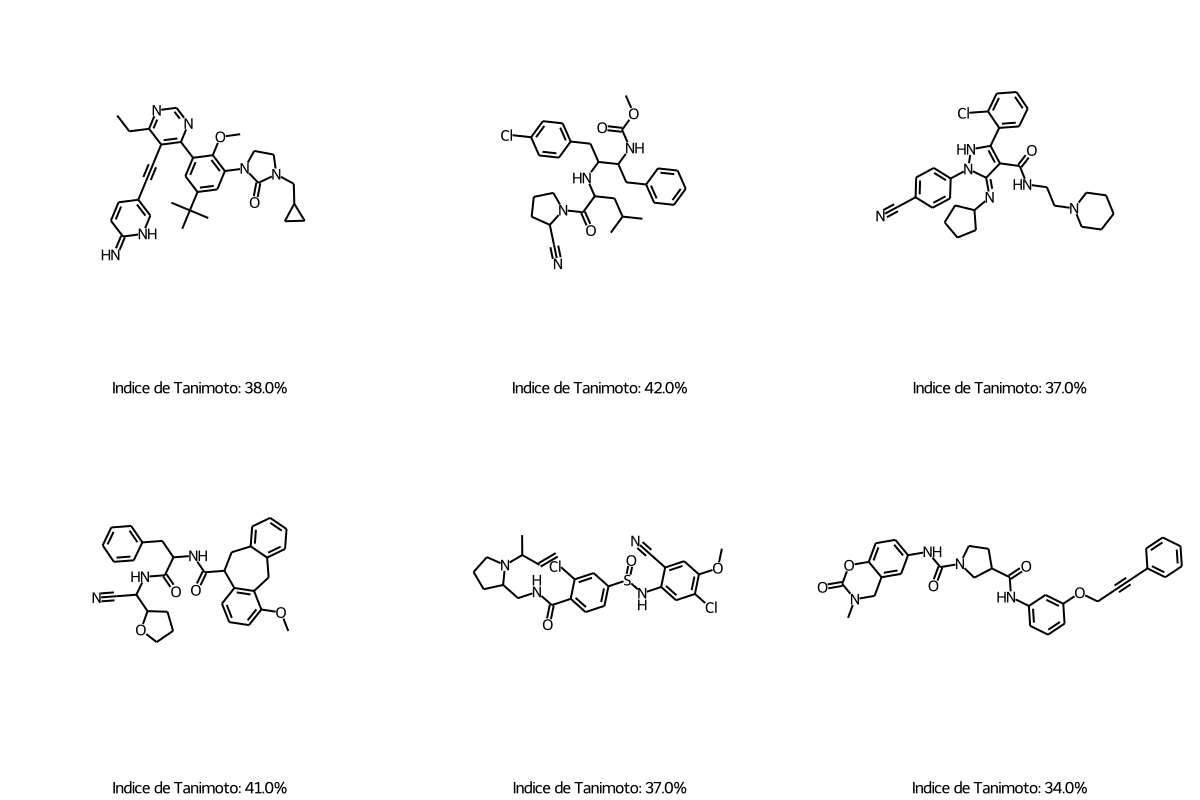

In [79]:
imagem_ligs_k777 = Chem.Draw.MolsToGridImage(elementos_k777, legends=prob_k777,subImgSize=(400,400),returnPNG=False)
imagem_ligs_k777

NameError: name 'imagem_k777' is not defined